In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Process Input

In [2]:
census = pd.read_csv('census_income_learn.csv', header=None)
census.columns = ['AGE', 'CLSWKR', 'INDUSTRY', 'OCCUPATION', 'EDU', 'WAGE', 'SCHOOL ATTENDING', 
                  'MARRIAGE', 'INDUSTRY CODE', 'OCCUPATION CODE', 'RACE', 'HISPANIC ORI', 'SEX', 'MEM UNION', 
                  'UNEMPLOY REASON', 'EMPLOYMENT STATUS', 'CAPGAIN', 'CAPLOSS' , 'DIVIDENT',
                  'FEDTAX', 'TAX FILLER', 'PREVIOUS STATE', 'HOUSEHOLD STATUS', 
                  'FAMILY STATUS', 'WEIGHT', 'MIGRANT  (MSA)', 'MIGRANT (REG)', 
                  'MIGRANT (WITHIN REG)', 'LIVE IN HOUSE', 'LIVE IN SUNBELT', 'NUM EMPLOYEES', 
                  'PARENT PRESENTED', 'FATHER COUNTRY', 'MOTHER COUNTRY', 'SELF COUNTRY',
                  'CITIZEN', 'OWN BUSINESS', 'VETERAN QUESIONAIRES', 'VETERAN BENEFIT', 
                  'WORK WEEKs IN YEAR', 'YEAR', 'EARN']

print(census.head(5))
print(census.info())

   AGE                           CLSWKR  INDUSTRY  OCCUPATION  \
0   73                  Not in universe         0           0   
1   58   Self-employed-not incorporated         4          34   
2   18                  Not in universe         0           0   
3    9                  Not in universe         0           0   
4   10                  Not in universe         0           0   

                           EDU  WAGE  SCHOOL ATTENDING        MARRIAGE  \
0         High school graduate     0   Not in universe         Widowed   
1   Some college but no degree     0   Not in universe        Divorced   
2                   10th grade     0       High school   Never married   
3                     Children     0   Not in universe   Never married   
4                     Children     0   Not in universe   Never married   

                  INDUSTRY CODE                       OCCUPATION CODE  \
0   Not in universe or children                       Not in universe   
1                 

In [3]:
# Some general statistics
census.describe()

,AGE,INDUSTRY,OCCUPATION,WAGE,CAPGAIN,CAPLOSS,DIVIDENT,WEIGHT,NUM EMPLOYEES,OWN BUSINESS,VETERAN BENEFIT,WORK WEEKs IN YEAR,YEAR
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


There is no missing values. Some initial visualization of the data

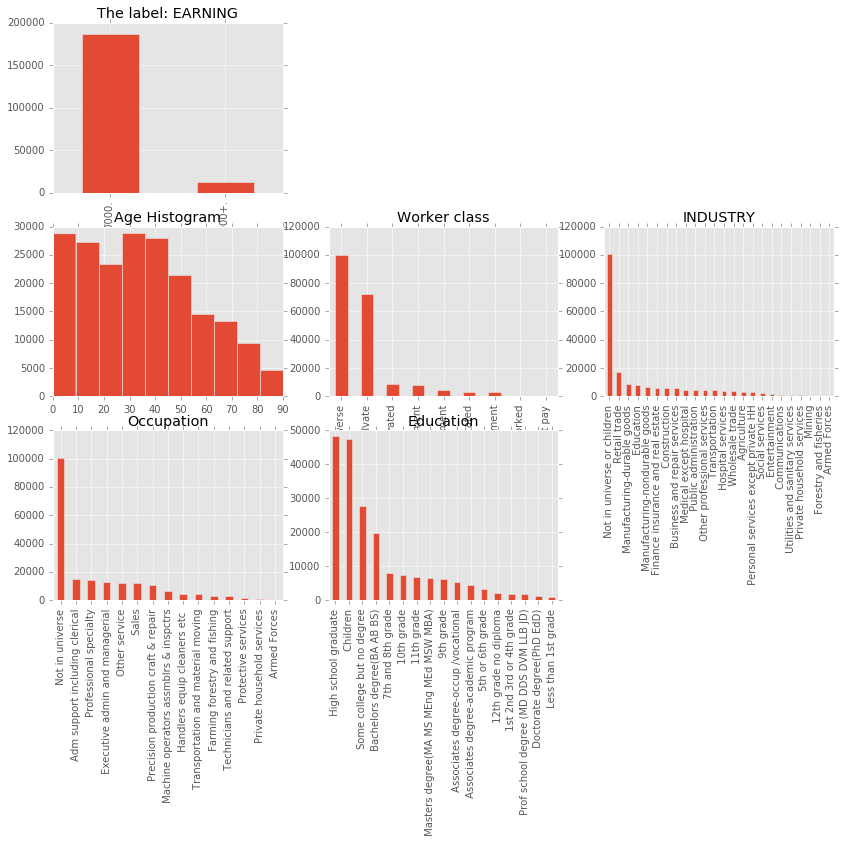

In [4]:
fig = plt.figure(figsize=(14, 14))
fig_dims = (4, 3)

# The label
plt.subplot2grid(fig_dims, (0, 0))
census['EARN'].value_counts().plot(kind='bar', title='The label: EARNING')

plt.subplot2grid(fig_dims, (1, 0))
census['AGE'].hist()
plt.title('Age Histogram')

plt.subplot2grid(fig_dims, (1, 1))
census['CLSWKR'].value_counts().plot(kind='bar', title='Worker class')

plt.subplot2grid(fig_dims, (1, 2))
census['INDUSTRY CODE'].value_counts().plot(kind='bar', title='INDUSTRY')

plt.subplot2grid(fig_dims, (2, 0))
census['OCCUPATION CODE'].value_counts().plot(kind='bar', title='Occupation')

plt.subplot2grid(fig_dims, (2, 1))
census['EDU'].value_counts().plot(kind='bar', title='Education')

## Feature: Age

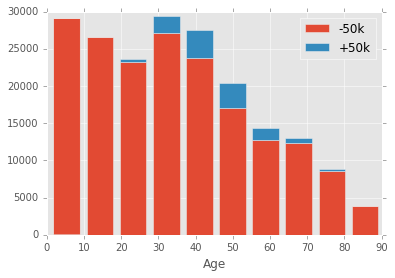

In [5]:
df1 = census[census['EARN'] == ' - 50000.']['AGE']
df2 = census[census['EARN'] == ' 50000+.']['AGE']

max_age = max(census['AGE'])
plt.hist([df1, df2], range=(1, max_age), stacked=True)
plt.legend(('-50k', '+50k'), loc='best')
plt.xlabel('Age')

From the graph, the age has an effect on the total earning, with people in 30 - 50 years old has a higher chance of earning 50k+ than people in different age group.

## Feature: Class Worker

 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government                  2925
 Never worked                         439
 Without pay                          165
Name: CLSWKR, dtype: int64

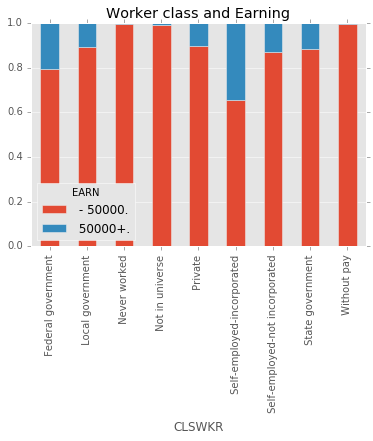

In [6]:
sex_val_xt = pd.crosstab(census['CLSWKR'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Worker class and Earning')

census['CLSWKR'].value_counts()

## Feauture: Industry

This column is the same as 'INDUSTRY CODE' encoded.

In [7]:
census.loc[:, ['INDUSTRY', 'INDUSTRY CODE']].head(15)

,INDUSTRY,INDUSTRY CODE
0,0,Not in universe or children
1,4,Construction
2,0,Not in universe or children
3,0,Not in universe or children
4,0,Not in universe or children
5,40,Entertainment
6,34,Finance insurance and real estate
7,4,Construction
8,43,Education
9,4,Construction


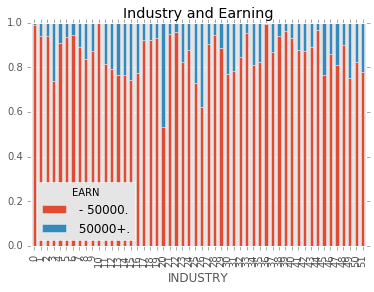

In [8]:
sex_val_xt = pd.crosstab(census['INDUSTRY'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Industry and Earning')

## Feature: Occupation

It also has 'Occupation Code' like the 'Industry Code' above

In [9]:
census.loc[:, ['OCCUPATION', 'OCCUPATION CODE']].head(20)

,OCCUPATION,OCCUPATION CODE
0,0,Not in universe
1,34,Precision production craft & repair
2,0,Not in universe
3,0,Not in universe
4,0,Not in universe
5,10,Professional specialty
6,3,Executive admin and managerial
7,40,Handlers equip cleaners etc
8,26,Adm support including clerical
9,37,Machine operators assmblrs & inspctrs


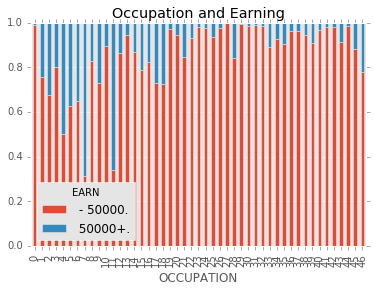

In [10]:
sex_val_xt = pd.crosstab(census['OCCUPATION'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Occupation and Earning')

This is also a good feature. 

## Feature: Education

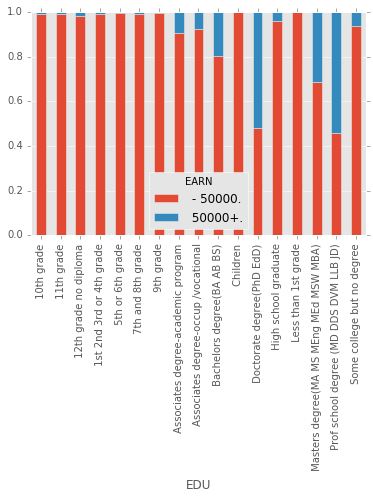

In [11]:
sex_val_xt = pd.crosstab(census['EDU'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True)

This is a very strong feature with people who have Doctorate degree or Professional Degree have a much higher chance than other group to earn more than 50k+

## Feature: Wage

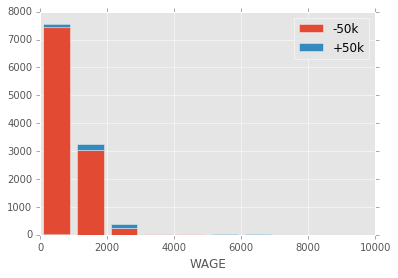

In [12]:
df1 = census[census['EARN'] == ' - 50000.']['WAGE']
df2 = census[census['EARN'] == ' 50000+.']['WAGE']

max_age = max(census['WAGE'])
plt.hist([df1, df2], range=(1, max_age), stacked=True)
plt.legend(('-50k', '+50k'), loc='best')
plt.xlabel('WAGE')

This is not a good feature because there are a lot of people who has 0 wage but somehow earn more than 50k+ a year. Moreover, there are no distinction among groups.

## Feature: Attending School

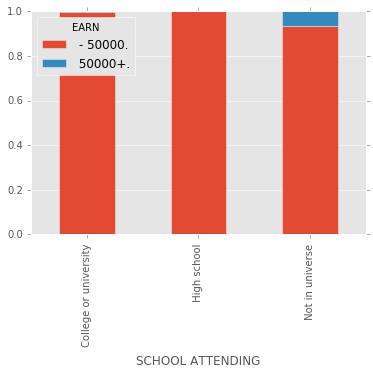

In [13]:
sex_val_xt = pd.crosstab(census['SCHOOL ATTENDING'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True)

## Feature: Marriage

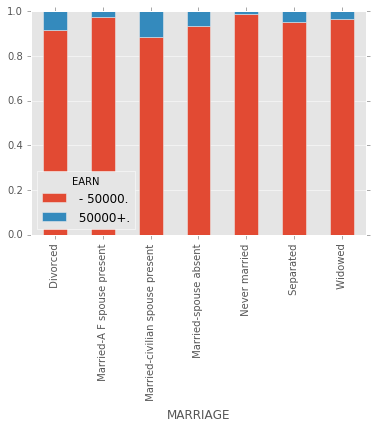

In [14]:
sex_val_xt = pd.crosstab(census['MARRIAGE'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True)

## Feature: Race

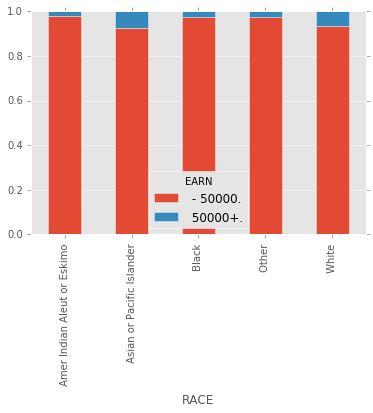

In [15]:
sex_val_xt = pd.crosstab(census['RACE'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True)

## Feature: Hispanic Origin

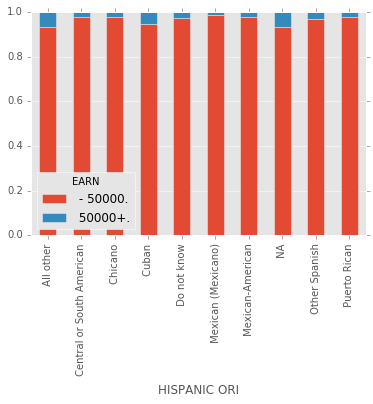

In [16]:
sex_val_xt = pd.crosstab(census['HISPANIC ORI'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True)

Not a good feature when NA has higher chance of earning more than 50k.

## Feature: Member Union

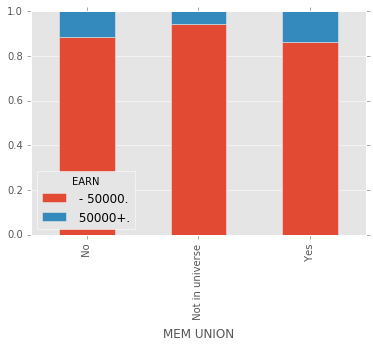

In [17]:
sex_val_xt = pd.crosstab(census['MEM UNION'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True)

Not a good feature

## Feature: Employment Status

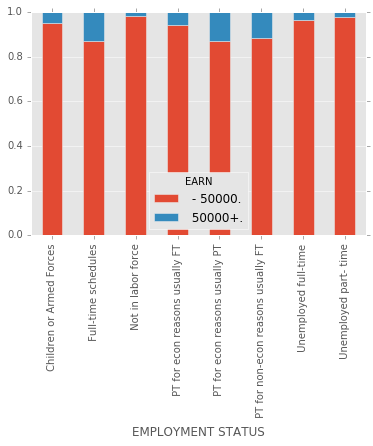

In [18]:
sex_val_xt = pd.crosstab(census['EMPLOYMENT STATUS'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True)

Good feature

## Feature: Gender

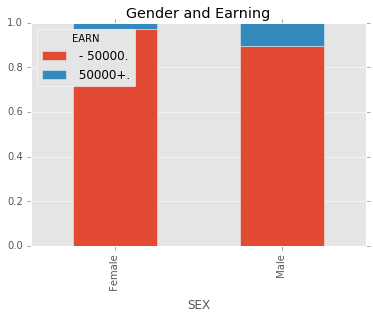

In [19]:
# compare to the earning label
sex_val_xt = pd.crosstab(census['SEX'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Gender and Earning')

Males are more likely to earn 50k+ more than females. This is a good feature. 

## Feature: Capital Gain, Capital Loss

We create a new feature of Captial Net = Captial Gain - Captial Loss

## Feature: Family Status

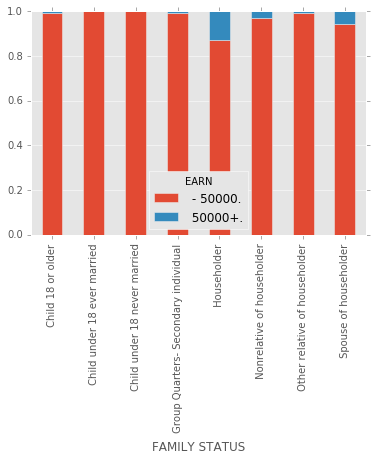

In [20]:
sex_val_xt = pd.crosstab(census['FAMILY STATUS'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True)

## Feature: Live in the same house last year

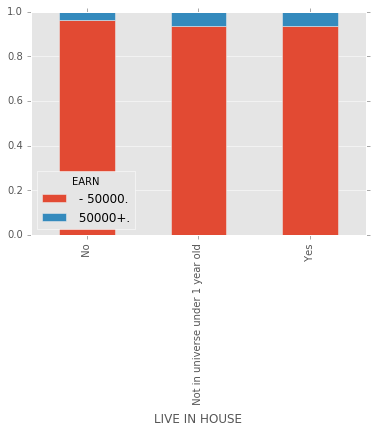

In [21]:
sex_val_xt = pd.crosstab(census['LIVE IN HOUSE'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True)

Not a good feature

## Feature: Born in USA

We refactor the feature of country of self into 2 categories: in USA or outside of USA. The less number of classes can give a better predictions.

In [22]:
census.loc[census['SELF COUNTRY'] == ' ?', 'SELF COUNTRY'] = 'Unknown'
census.loc[census['SELF COUNTRY'] == ' United-States', 'SELF COUNTRY'] = 'USA'
census.loc[(census['SELF COUNTRY'] != 'Unknown') & (census['SELF COUNTRY'] != 'USA' ), 'SELF COUNTRY'] = 'Outside'

census['SELF COUNTRY'].value_counts()

USA        176989
Outside     19141
Unknown      3393
Name: SELF COUNTRY, dtype: int64

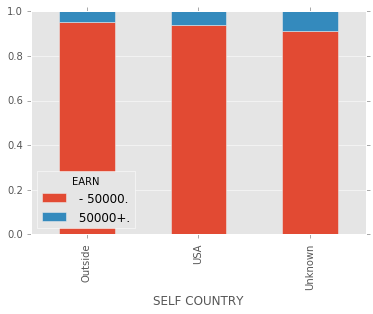

In [23]:
sex_val_xt = pd.crosstab(census['SELF COUNTRY'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True)

## Feature: Citizen

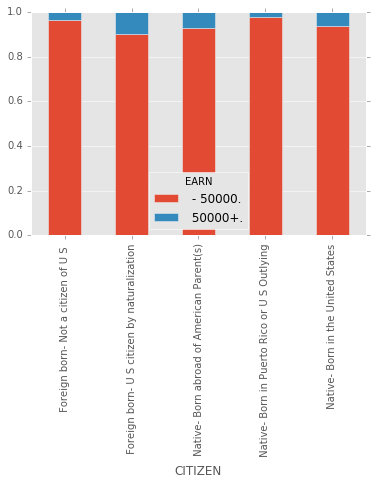

In [24]:
sex_val_xt = pd.crosstab(census['CITIZEN'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True)


## Prepare the input data
Change the 'EARN' row to [1, 0] and other non-numeric columns for classification

In [25]:
# A function to change a non-numeric to numeric values
def changeToNumeric(data, classes):
    for class_ in classes:
        count = 0;
        for i in data[class_].unique():
            data.loc[data[class_] == i, class_] = count
            count += 1

In [26]:
def processInput(data):
    
    data['CAP NET'] = (data['CAPGAIN'] - data['CAPLOSS'])
        
    changeToNumeric(data, ['EARN', 'CLSWKR', 'SEX', 'EDU', 'SCHOOL ATTENDING', 'MARRIAGE', 'RACE',
                          'EMPLOYMENT STATUS', 'FAMILY STATUS', 'SELF COUNTRY', 'CITIZEN'])
    
    #drop some useless columns
    data.drop('YEAR', axis=1, inplace=True)

In [27]:
print(census['EARN'].unique())
processInput(census)
print(census['EARN'].unique())    # A little test

[' - 50000.' ' 50000+.']
[0 1]


In [28]:
# The data is heavily skewed toward not making 50,000. If the model only predict 0, then it has the accuracy of
print(census['EARN'].value_counts())
print(float(187141)/199523)

0    187141
1     12382
Name: EARN, dtype: int64
0.93794199165


# Simple Logistic Regression

In [29]:
#Logistic Regression
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

predictors = ["AGE", "CLSWKR", "INDUSTRY", "OCCUPATION", "EDU", "WAGE", 'SCHOOL ATTENDING', 'CITIZEN',
              'EMPLOYMENT STATUS','MARRIAGE', 'RACE', "DIVIDENT", "SEX", 'FAMILY STATUS', 'SELF COUNTRY',
              "NUM EMPLOYEES", "CAP NET", "OWN BUSINESS","VETERAN BENEFIT", "WORK WEEKs IN YEAR"]

alg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds
scores = cross_validation.cross_val_score(alg, census[predictors], list(census["EARN"]), cv=3)
# Take the mean of the scores
print(scores.mean())

0.946722929917


# Random Forest 

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=20, min_samples_split=2, min_samples_leaf=1)

scores = cross_validation.cross_val_score(alg, census[predictors], list(census["EARN"]), cv=3)

print(scores.mean())

0.953168304191


# Find Best Features using SelectKBest

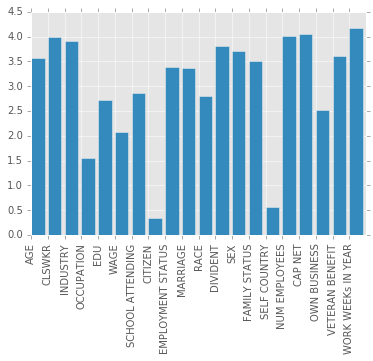

[  3.74414826e+03   9.68110044e+03   7.98706774e+03   3.59074055e+01
   5.34247406e+02   1.20110687e+02   7.17212055e+02   2.17529451e+00
   2.40857869e+03   2.27825008e+03   6.31430834e+02   6.36144175e+03
   5.08252665e+03   3.23500526e+03   3.65194099e+00   1.04101004e+04
   1.13121673e+04   3.27356826e+02   4.04302702e+03   1.47434869e+04]


In [31]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

selector = SelectKBest(f_classif, k='all')
selector.fit(census[predictors], census["EARN"])

scores = np.log10(selector.scores_)

# Plot the scores. 
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

print(selector.scores_)

We delete slowest scores features: Occupation, Wage, Citizen, Self Country.

In [32]:
predictors = ["AGE", "CLSWKR", "INDUSTRY", "EDU", 'SCHOOL ATTENDING',
              'EMPLOYMENT STATUS','MARRIAGE', 'RACE', "DIVIDENT", "SEX", 'FAMILY STATUS', 
              "NUM EMPLOYEES", "CAP NET", "OWN BUSINESS","VETERAN BENEFIT", "WORK WEEKs IN YEAR"]

alg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds
scores = cross_validation.cross_val_score(alg, census[predictors], list(census["EARN"]), cv=3)
# Take the mean of the scores
print(scores.mean())

0.94434726968


In [33]:
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
scores = cross_validation.cross_val_score(alg, census[predictors], list(census["EARN"]), cv=3)

print(scores.mean())

0.949314108576


# Apply the algorithm to Test file

In [34]:
census_test = pd.read_csv('census_income_test.csv', header=None)
census_test.columns = ['AGE', 'CLSWKR', 'INDUSTRY', 'OCCUPATION', 'EDU', 'WAGE', 'SCHOOL ATTENDING', 
                  'MARRIAGE', 'INDUSTRY CODE', 'OCCUPATION CODE', 'RACE', 'HISPANIC ORI', 'SEX', 'MEM UNION', 
                  'UNEMPLOY REASON', 'EMPLOYMENT STATUS', 'CAPGAIN', 'CAPLOSS' , 'DIVIDENT',
                  'FEDTAX', 'TAX FILLER', 'PREVIOUS STATE', 'HOUSEHOLD STATUS', 
                  'FAMILY STATUS', 'WEIGHT', 'MIGRANT  (MSA)', 'MIGRANT (REG)', 
                  'MIGRANT (WITHIN REG)', 'LIVE IN HOUSE', 'LIVE IN SUNBELT', 'NUM EMPLOYEES', 
                  'PARENT PRESENTED', 'FATHER COUNTRY', 'MOTHER COUNTRY', 'SELF COUNTRY',
                  'CITIZEN', 'OWN BUSINESS', 'VETERAN QUESIONAIRES', 'VETERAN BENEFIT', 
                  'WORK WEEKs IN YEAR', 'YEAR', 'EARN']

processInput(census_test)

In [37]:
predictors = ["AGE", "CLSWKR", "INDUSTRY", "EDU", 'SCHOOL ATTENDING',
              'EMPLOYMENT STATUS','MARRIAGE', 'RACE', "DIVIDENT", "SEX", 'FAMILY STATUS', 
              "NUM EMPLOYEES", "CAP NET", "OWN BUSINESS","VETERAN BENEFIT", "WORK WEEKs IN YEAR"]

alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

# Train the algorithm using all the training data
alg.fit(census[predictors], list(census['EARN']) )

# Make predictions using the test set.
predictions = alg.predict(census_test[predictors])

#Accuracy test set
accuracy = ( float((predictions == census_test["EARN"]).sum()) / len(predictions))
print(accuracy)

0.946392413945


In [38]:
#Compare to a navie model which only predict 0
print(census_test['EARN'].value_counts())
print(float(93576)/(93576+6186))

0    93576
1     6186
Name: EARN, dtype: int64
0.937992421964


In [39]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(list(census_test['EARN']), predictions)
#predictions

print ("          Predicted")
print ("         |  0    |  1  |")
print ("         |-------|-----|")
print ("       0 | %3d   | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-------|-----|")
print ("       1 | %3d   | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-------|-----|")

          Predicted
         |  0    |  1  |
         |-------|-----|
       0 | 93071   | 505 |
Actual   |-------|-----|
       1 | 4843   | 1343 |
         |-------|-----|


In [40]:
from sklearn.metrics import classification_report
print(classification_report(list(census_test['EARN']), 
                             predictions, 
                            target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97     93576
          1       0.73      0.22      0.33      6186

avg / total       0.94      0.95      0.93     99762

